In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
# acquire
url = 'https://gist.githubusercontent.com/zgulde/96991fedca29ff5371f5e7fa00d3fa95/raw/3e95d04e4ae544bf7b03b89dfde002ff502260a1/the_data.csv'
df = pd.read_csv(url)
df.head()

,timestamp,x,y
0,2018-04-30 00:00:00,1.84,A
1,2018-04-30 01:00:00,1.47,C
2,2018-04-30 02:00:00,0.20,B
3,2018-04-30 03:00:00,0.17,C
4,2018-04-30 04:00:00,2.06,C


In [8]:
df.head()

,timestamp,x,y
0,2018-04-30 00:00:00,1.84,A
1,2018-04-30 01:00:00,1.47,C
2,2018-04-30 02:00:00,0.20,B
3,2018-04-30 03:00:00,0.17,C
4,2018-04-30 04:00:00,2.06,C


In [9]:
df.shape

(48, 3)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
timestamp    48 non-null object
x            48 non-null float64
y            48 non-null object
dtypes: float64(1), object(2)
memory usage: 1.2+ KB


In [23]:
df.timestamp = pd.to_datetime(df.timestamp)
df.head()

,timestamp,x,y
0,2018-04-30 00:00:00,1.84,A
1,2018-04-30 01:00:00,1.47,C
2,2018-04-30 02:00:00,0.20,B
3,2018-04-30 03:00:00,0.17,C
4,2018-04-30 04:00:00,2.06,C


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
timestamp    48 non-null datetime64[ns]
x            48 non-null float64
y            48 non-null object
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.2+ KB


In [24]:
df = df.set_index('timestamp')

In [10]:
df.head()

,x,y
timestamp,,
2018-04-30 00:00:00,1.84,A
2018-04-30 01:00:00,1.47,C
2018-04-30 02:00:00,0.20,B
2018-04-30 03:00:00,0.17,C
2018-04-30 04:00:00,2.06,C


**By Group**

1. What is the maximum x value for group B?

2. What is the average x value for group A?

3. What is the minimum x value for group C?

4. Which group has the highest sum of x values?

In [13]:
df.describe()

,x
count,48.000000
mean,0.026250
std,1.097024
min,-2.050000
25%,-0.842500
50%,0.190000
75%,0.687500
max,2.060000


In [14]:
df.groupby('y').describe()

x                                                      
  count      mean       std   min     25%   50%     75%   max
y                                                            
A  18.0 -0.110556  0.925784 -1.30 -0.9075 -0.08  0.2575  1.84
B  13.0 -0.053846  1.328731 -2.05 -0.8100  0.20  0.7400  1.91
C  17.0  0.232353  1.108594 -1.83 -0.1300  0.28  0.9800  2.06

In [16]:
# What is the maximum x value for group B?
df.groupby('y')['x'].max()

y
A    1.84
B    1.91
C    2.06
Name: x, dtype: float64

In [15]:
# alternative
df.groupby('y').x.max().B

1.91

In [19]:
print('Max x value for group B is: {}'.format(df[df['y'] == 'B']['x'].max()))

Max x value for group B is: 1.91


In [20]:
# What is the average x value for group A?
df.groupby('y')['x'].mean()

y
A   -0.110556
B   -0.053846
C    0.232353
Name: x, dtype: float64

In [26]:
print('Average x value for group A is: {:.2f}'.format(df[df.y == 'A']['x'].mean()))


Average x value for group A is: -0.11


In [27]:
# What is the minimum x value for group C?
df.groupby('y')['x'].min()

y
A   -1.30
B   -2.05
C   -1.83
Name: x, dtype: float64

In [29]:
print('Minimum x value for group C is: {:.2f}'.format(df[df.y =='C']['x'].min()))

Minimum x value for group C is: -1.83


In [36]:
# Which group has the highest sum of x values?
df.groupby('y')['x'].sum().idxmax()

'C'

In [16]:
df.groupby('y')['x'].sum().idxmin()

'A'

**Time Aggregates**

1. What is the sum of the x values for 2018-05-01?

2. What is the average x value for each day? The median?

3. Which day has the largest x value?

4. Which day has the smallest x value for group C?

In [25]:
df.groupby(df.index.date).sum()

,x
2018-04-30,5.28
2018-05-01,-4.02


In [38]:
# What is the sum of the x values for 2018-05-01?
df['2018-05-01']['x'].sum()

-4.02

In [26]:
df.groupby(df.index.date).agg(['mean','median'])

x       
              mean median
2018-04-30  0.2200  0.175
2018-05-01 -0.1675  0.220

In [45]:
# What is the average x value for each day? The median?
print('The average of x for each day is: {}'.format(df.resample('D')['x'].mean()))
print('\n')
print('The median of x for each day is: {}'.format(df.resample('D')['x'].median()))

The average of x for each day is: timestamp
2018-04-30    0.2200
2018-05-01   -0.1675
Freq: D, Name: x, dtype: float64


The median of x for each day is: timestamp
2018-04-30    0.175
2018-05-01    0.220
Freq: D, Name: x, dtype: float64


In [51]:
# Which day has the largest x value?
df.resample('D')['x'].sum().idxmax()

Timestamp('2018-04-30 00:00:00', freq='D')

In [28]:
df.groupby(df.index.date).x.max().idxmax()

datetime.date(2018, 4, 30)

In [61]:
# Which day has the smallest x value for group C?
df.groupby('y').resample('D')['x'].min()

y  timestamp 
A  2018-04-30   -1.11
   2018-05-01   -1.30
B  2018-04-30   -2.05
   2018-05-01   -2.05
C  2018-04-30   -1.07
   2018-05-01   -1.83
Name: x, dtype: float64

In [32]:
x = df.groupby(['y', df.index.date]).x.min()
# focus only on c group
print(x.C)
print(x.C.idxmin())

2018-04-30   -1.07
2018-05-01   -1.83
Name: x, dtype: float64
2018-05-01


Visualization

1. Visualize the minimum x value of each group with a bar chart.

2. Visualize x over time.

3. Visualize x over time by y value.

In [86]:
# Visualize the minimum x value of each group with a bar chart.
a = df.groupby('y')['x'].min()

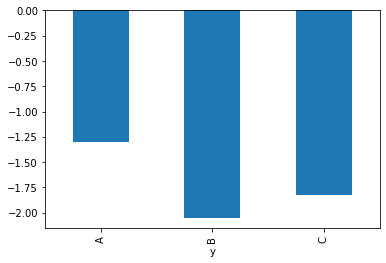

In [91]:
a.plot.bar()

In [38]:
values = df.groupby('y').min()
values

,x
y,
A,-1.30
B,-2.05
C,-1.83


In [39]:
labels = df.groupby('y').min().index
labels

Index(['A', 'B', 'C'], dtype='object', name='y')

In [40]:
y_values = list(values.x)

In [ ]:
plt.bar(values, )

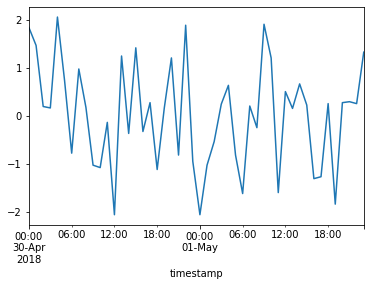

In [92]:
df.x.plot()

More Aggregation

1. What is the least frequent y value for 2018-04-30?

2. What is the most frequent y value for each day?

In [79]:
df['2018-04-30']['y'].value_counts()

A    10
B     7
C     7
Name: y, dtype: int64

In [83]:
df.y.value_counts()

A    18
C    17
B    13
Name: y, dtype: int64